In [70]:
import pandas as pd 
import numpy as np 

In [71]:
data = pd.read_excel("org134-final.xlsx")

In [77]:
data.shape
dictionary = pd.read_excel('org134-final.xlsx',sheet_name='Sheet4')

In [78]:
orgs = ['Org1_', 'Org 4', 'Org 3']

combined = {} 

In [79]:

updated = dictionary['Variable Name - Updated'].unique()
for u in updated:
    if u in combined.keys():
        combined[u].extend(list(dictionary[dictionary['Variable Name - Updated']==u]['Variable Name']))
    else:
        combined[u] = list(dictionary[dictionary['Variable Name - Updated']==u]['Variable Name']) 

In [80]:
for key in combined.keys():
    combined[key] = list(set(combined[key]))

In [81]:
combined.keys()

dict_keys(['Collaborative Work Enivornmental Preferences', 'Current Focused Work ', 'Department', 'Focused Work Environmental Preferences', 'Office Satisfaction', 'Organization', 'Pre Covid In Person Collab Work (1-3 people)', 'Pre Covid In Person Collab Work (4-10+ people)', 'Pre-Covid Hybrid Meetings', 'Pre-Covid In Person Meetings', 'Pre-Covid Remote Meetings', 'Recommendations Questions', 'Work Location Deciding Factors', 'Work Satisf Features', 'Workplace Preference'])

In [82]:
for key in combined.keys():
    if key != 'Department' and key != 'Organization':
        for column in combined[key]:
            if column in data.columns:
                data[column].fillna(data[column].mean(),inplace=True) 

TypeError: can only concatenate str (not "int") to str

In [10]:
data.isna().sum()

Unnamed: 0.1                             0
PREF_features_G_light                    0
PREF_Envr_Focus_1H_energy                0
PREF_features_A_chair                    0
OBSV_PreC_meetingsize0ffice_C_4n9        0
PostC_impact_shift_C_collab              0
OBSV_PreC_meetingsize0ffice_B_2n3        0
OBSV_Now_WrkTimeA_Indiv_fract_vCollab    0
PREF_space_G_firstarrive                 0
OBSV_PreC_meeting_C_remote               0
PREF_CollabSpace_C_CollabTools           0
DEMO_Org                                 0
PREF_Envr_Focus_1D_color                 0
PREF_space_E_recharge                    0
PREF_space_F_accessible                  0
PREF_Envr_Collab_2C_remote               0
PostC_impact_shift_F_colleagueaccess     0
PREF_features_T_greenspace               0
OBSV_PreC_meetingsize0ffice_A_1          0
PREF_Envr_Collab_2B_closure              0
PREF_features_H_nature                   0
PREF_Envr_Collab_2F_formality            0
PREF_features_O_food                     0
PREF_Envr_C

In [11]:
for key in combined.keys():
    if key != 'Department' and key != 'Organization' and len(combined[key]) > 0:
          data[key] = data[combined[key]].mean(axis=1) 

In [12]:
for key in combined.keys():
    if key != 'Department' and key != 'Organization' and len(combined[key]) > 0:
        s = 0 
        for column in combined[key]:
            if column in data.columns: 
                data.drop(column,axis=1,inplace=True)

In [13]:
data.head()

,Unnamed: 0.1,DEMO_Org,Unnamed: 0,DEMO_Dept,Collaborative Work Enivornmental Preferences,Current Focused Work,Focused Work Environmental Preferences,Office Satisfaction,Pre Covid In Person Collab Work (1-3 people),Pre Covid In Person Collab Work (4-10+ people),Pre-Covid Hybrid Meetings,Pre-Covid In Person Meetings,Pre-Covid Remote Meetings,Recommendations Questions,Work Location Deciding Factors,Work Satisf Features,Workplace Preference
0,4,Org 3,4,Accounting,7.714286,0.875,7.571429,5.0,0.671493,0.357932,0.3,0.504394,0.22764,2.384615,2.000000,4.5,0.000000
1,5,Org 3,5,Accounting,4.857143,0.875,1.571429,5.0,0.300000,0.200000,0.3,0.600000,0.10000,2.076923,3.333333,5.0,0.428571
2,8,Org 3,8,Accounting,6.285714,0.975,0.866196,4.0,0.150000,0.700000,0.8,0.200000,0.00000,2.461538,2.500000,2.5,0.571429
3,9,Org 3,9,Accounting,5.000000,0.875,4.428571,4.5,0.300000,0.350000,0.2,0.700000,0.10000,2.538462,3.500000,4.0,0.285714
4,10,Org 3,10,Accounting,1.000000,0.875,1.571429,4.0,0.328132,0.500000,0.5,0.500000,0.22764,1.615385,1.666667,2.0,0.714286


In [14]:
data.columns


Index(['Unnamed: 0.1', 'DEMO_Org', 'Unnamed: 0', 'DEMO_Dept',
       'Collaborative Work Enivornmental Preferences', 'Current Focused Work ',
       'Focused Work Environmental Preferences', 'Office Satisfaction',
       'Pre Covid In Person Collab Work (1-3 people)',
       'Pre Covid In Person Collab Work (4-10+ people)',
       'Pre-Covid Hybrid Meetings', 'Pre-Covid In Person Meetings',
       'Pre-Covid Remote Meetings', 'Recommendations Questions',
       'Work Location Deciding Factors', 'Work Satisf Features',
       'Workplace Preference'],
      dtype='object')

In [15]:
data.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [16]:
data.head()
pd.set_option('display.max_columns', None) 

pd.set_option('display.max_rows', None)

In [17]:
data.describe()

,Collaborative Work Enivornmental Preferences,Current Focused Work,Focused Work Environmental Preferences,Office Satisfaction,Pre Covid In Person Collab Work (1-3 people),Pre Covid In Person Collab Work (4-10+ people),Pre-Covid Hybrid Meetings,Pre-Covid In Person Meetings,Pre-Covid Remote Meetings,Recommendations Questions,Work Location Deciding Factors,Work Satisf Features,Workplace Preference
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,5.349022,0.678167,4.084951,4.122003,0.328132,0.357932,0.381822,0.504394,0.227640,2.202516,2.471004,4.334274,0.378400
std,1.503380,0.222386,1.498473,0.801330,0.129221,0.234954,0.253927,0.274741,0.203925,0.296570,1.166024,0.766923,0.247294
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,4.482344,0.500000,3.142857,4.000000,0.250000,0.200000,0.200000,0.250000,0.100000,1.939957,1.666667,4.000000,0.142857
50%,5.428571,0.750000,4.084951,4.000000,0.328132,0.357932,0.381822,0.504394,0.227640,2.164325,2.500000,4.500000,0.285714
75%,6.285714,0.875000,5.000000,5.000000,0.400000,0.450000,0.500000,0.700000,0.227640,2.384615,3.333333,5.000000,0.571429
max,10.000000,1.000000,10.000000,5.000000,0.671493,1.000000,1.000000,1.000000,1.000000,2.846154,5.000000,5.000000,1.000000


In [18]:
combined['Home Satisfaction']

KeyError: 'Home Satisfaction'

In [19]:
data.describe().to_excel("descriptive.xlsx")

In [20]:
data.to_excel("org134-combined.xlsx")

In [21]:
data.columns

Index(['DEMO_Org', 'DEMO_Dept', 'Collaborative Work Enivornmental Preferences',
       'Current Focused Work ', 'Focused Work Environmental Preferences',
       'Office Satisfaction', 'Pre Covid In Person Collab Work (1-3 people)',
       'Pre Covid In Person Collab Work (4-10+ people)',
       'Pre-Covid Hybrid Meetings', 'Pre-Covid In Person Meetings',
       'Pre-Covid Remote Meetings', 'Recommendations Questions',
       'Work Location Deciding Factors', 'Work Satisf Features',
       'Workplace Preference'],
      dtype='object')

In [22]:
data['Workplace Preference']

0      0.000000
1      0.428571
2      0.571429
3      0.285714
4      0.714286
5      0.142857
6      0.285714
7      0.000000
8      0.285714
9      0.285714
10     0.714286
11     0.142857
12     0.428571
13     0.000000
14     0.285714
15     0.142857
16     0.428571
17     0.285714
18     0.428571
19     0.285714
20     0.142857
21     0.142857
22     0.142857
23     0.142857
24     0.142857
25     0.285714
26     0.428571
27     0.142857
28     0.000000
29     0.285714
30     0.571429
31     0.285714
32     0.857143
33     0.571429
34     0.571429
35     0.428571
36     0.428571
37     0.571429
38     0.142857
39     0.285714
40     0.428571
41     0.714286
42     0.142857
43     0.142857
44     0.142857
45     0.285714
46     0.142857
47     0.142857
48     0.000000
49     1.000000
50     0.285714
51     0.714286
52     0.285714
53     0.571429
54     0.285714
55     0.571429
56     0.714286
57     0.142857
58     0.428571
59     0.142857
60     0.142857
61     0.571429
62     0

In [38]:
y = data['Workplace Preference']

y.value_counts()

Workplace Preference
0.285714    172
0.142857    161
0.428571    140
0.571429     82
0.714286     49
0.000000     46
0.857143     33
1.000000     26
0.378400      4
Name: count, dtype: int64

In [62]:
from xgboost import XGBRegressor,plot_importance,plot_tree

In [32]:
xgb = XGBRegressor()

In [33]:
from sklearn.model_selection import train_test_split

In [51]:
X = data.drop(['Workplace Preference'],axis=1)

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [53]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
data.drop(['DEMO_Org'],axis=1,inplace=True)

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
encoder = LabelEncoder()

In [50]:
data['DEMO_Dept'] = encoder.fit_transform(data.DEMO_Dept)

In [54]:
preds = xgb.predict(X_test)

In [55]:
import matplotlib.pyplot as plt

<BarContainer object of 13 artists>

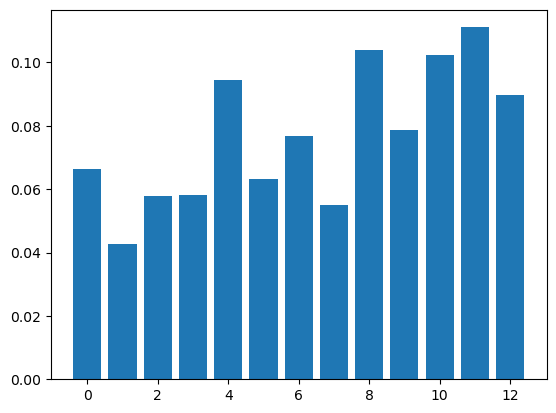

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

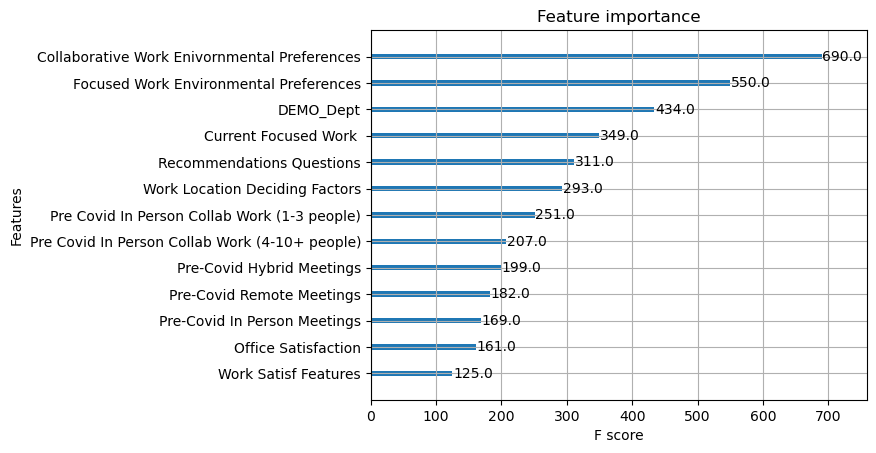

In [61]:
plot_importance(xgb)

<Axes: >

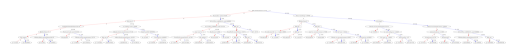

In [66]:
!pip install graphviz
plot_tree(xgb)

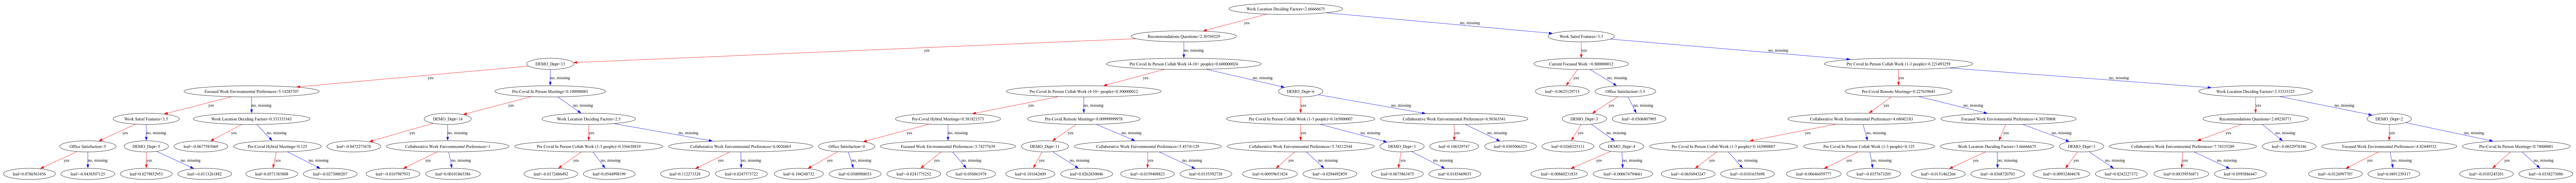

In [68]:
plot_tree(xgb, num_trees=1)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')